In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import talib
import seaborn as sns

from solo.getdata import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# 一、获取数据
## 参数说明：
- 'name'：名称
- 'start'：开始时间
- 'data_type'：数据处理方式，'normal'：原始数据, 'carg'：复合增长率, 'grow'：增长速度
- 'ktype' ：时间周期

In [2]:
new_data = data_recieve(name='399300',start = '2004-10-01',data_type = 'carg',ktype='D')

获得原始数据：	 399300
起始时间：	 2005-04-08
结束时间：	 2017-02-28
数据个数：	 2890

      open    close     high     low      volume
0   984.66  1003.45  1003.70  979.53  14762500.0
1  1003.88   995.42  1008.73  992.77  15936100.0
2   993.71   978.70   993.71  978.20  10226200.0
3   987.95  1000.90  1006.50  987.95  16071700.0
4  1004.64   986.97  1006.42  985.58  12945700.0

查看最新数据：

                open      high     close       low    volume
2005-04-11  0.019519  0.005011 -0.008002  0.013517  0.079499
2005-04-12 -0.010131 -0.014890 -0.016797 -0.014676 -0.358300
2005-04-13 -0.005796  0.012871  0.022683  0.009967  0.571620
2005-04-14  0.016894 -0.000079 -0.013917 -0.002399 -0.194503
2005-04-15 -0.021928 -0.023658 -0.013060 -0.013850 -0.195949




# 二、建立特征
## 参数说明：
- 'data'：数据集
- 'time'：多个时间周期
- 'normal'：是否对数据进行归一化
- 'pattern' ：是否加入k模式识别

In [3]:
ml_datas = data_indicator(data=new_data,time=[5,10,20,30,60],pattern=True,normal=True)

In [4]:
ml_datas.describe()

,DEMA_open_5,EMA_open_5,KAMA_open_5,MA_open_5,MIDPOINT_open_5,SMA_open_5,T3_open_5,TRIMA_open_5,WMA_open_5,CMO_open_5,...,MAMA_mama,MAMA_fama,STOCH_slowk,STOCH_slowd,STOCHF_fastk,STOCHF_fastd,SAR,SAREXT,ULTOSC,target
count,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,...,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2534.000000
mean,-8.067080e-18,-4.929517e-17,6.668348e-17,8.961962e-17,-3.919079e-17,8.961962e-17,1.046092e-16,1.774429e-18,6.163403e-17,1.146259e-17,...,-7.719862e-17,7.484367e-17,4.311205e-17,-3.207116e-16,-7.886351e-18,4.311205e-17,2.653976e-17,-4.718667e-16,2.492087e-16,0.037096
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,...,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.914323
min,-6.879581e+00,-6.828407e+00,-3.865428e+00,-6.266030e+00,-4.770356e+00,-6.266030e+00,-6.079179e+00,-6.063260e+00,-6.743150e+00,-3.300332e+00,...,-4.493369e+00,-3.438499e+00,-3.472618e+00,-3.463685e+00,-5.264618e+00,-3.472618e+00,-2.670406e+00,-3.885397e+00,-4.684086e+00,-9.000000
25%,-4.929939e-01,-5.320015e-01,-5.237369e-01,-5.437728e-01,-5.307976e-01,-5.437728e-01,-5.353566e-01,-5.441002e-01,-5.406476e-01,-6.874905e-01,...,-5.346192e-01,-5.354208e-01,-6.934438e-01,-7.302864e-01,-7.317571e-01,-6.934438e-01,-6.789135e-01,-4.892524e-01,-6.585407e-01,-1.000000
50%,2.816460e-02,2.534905e-02,7.497099e-02,2.052509e-02,4.371917e-02,2.052509e-02,3.195691e-02,9.455325e-03,2.544241e-02,-3.087063e-03,...,2.522643e-02,5.425176e-04,2.621713e-04,1.497818e-02,1.113017e-02,2.621713e-04,-1.545793e-01,2.269594e-01,1.920022e-02,0.000000
75%,5.537439e-01,5.910117e-01,6.107503e-01,5.976920e-01,6.030920e-01,5.976920e-01,6.246709e-01,5.828155e-01,6.063891e-01,7.162029e-01,...,5.559085e-01,6.156152e-01,7.395991e-01,7.560071e-01,7.509557e-01,7.395991e-01,8.014835e-01,7.235539e-01,7.176579e-01,1.000000
max,5.807720e+00,4.417175e+00,3.055940e+00,3.624271e+00,6.179925e+00,3.624271e+00,3.479735e+00,4.638870e+00,4.000902e+00,3.609216e+00,...,4.098329e+00,3.355834e+00,3.043678e+00,3.039008e+00,3.666692e+00,3.043678e+00,3.074202e+00,2.009339e+00,3.304570e+00,9.000000


(array([   0.,    3.,    5.,   13.,    9.,   34.,   38.,   82.,  187.,
         439.,  805.,  485.,  237.,  120.,   43.,   21.,    6.,    3.,    4.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9]),
 <a list of 19 Patch objects>)

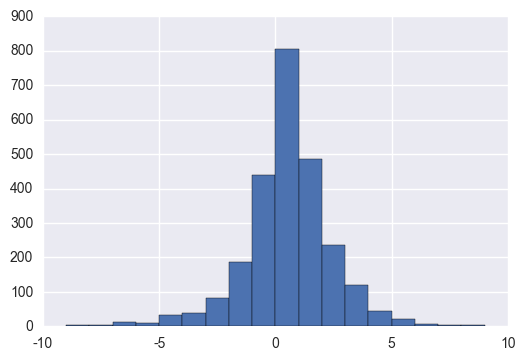

In [5]:
#y设定为符合增长率求整
X = ml_datas.drop(['target'],axis=1)
y = ml_datas['target']
plt.hist(y.values,np.arange(-10,10))

Feature ranking
1, feature MOM_volume_30 (0.001864)
2, feature STOCHRSI_fastk_volume_10 (0.001850)
3, feature STOCHRSI_fastk_close_5 (0.001845)
4, feature STOCHRSI_fastk_volume_5 (0.001842)
5, feature HT_SINE_leadsine (0.001792)
6, feature MOM_open_10 (0.001784)
7, feature MOM_low_60 (0.001773)
8, feature NATR (0.001767)
9, feature STOCHRSI_fastk_volume_30 (0.001767)
10, feature STOCHRSI_fastk_close_10 (0.001758)
11, feature MOM_volume_5 (0.001757)
12, feature MOM_high_60 (0.001754)
13, feature MOM_open_30 (0.001754)
14, feature HT_SINE_sine (0.001728)
15, feature MOM_open_5 (0.001725)
16, feature STOCHRSI_fastk_volume_60 (0.001724)
17, feature STOCHRSI_fastd_volume_30 (0.001722)
18, feature MOM_volume_60 (0.001722)
19, feature STOCHRSI_fastd_open_60 (0.001709)
20, feature STOCHRSI_fastd_volume_10 (0.001703)


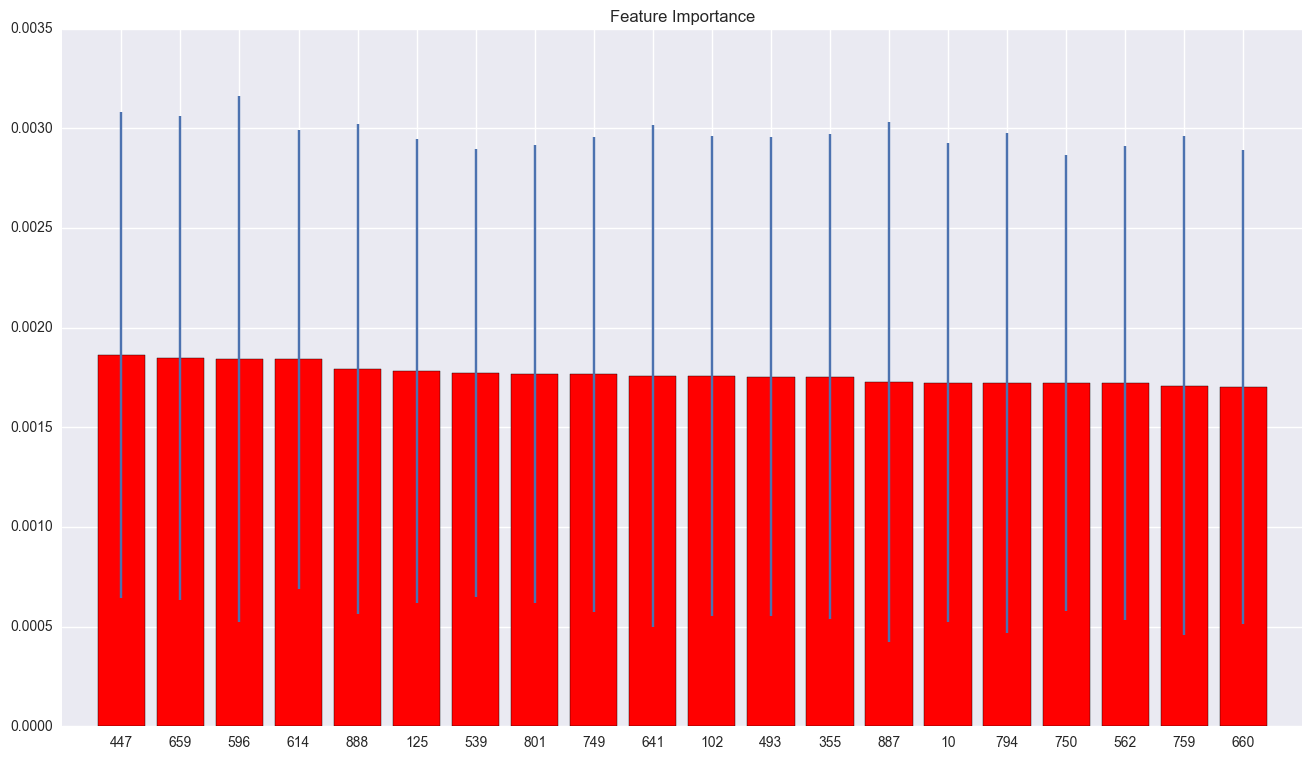

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators = 250,random_state = 0)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print('Feature ranking')

indices = indices[:20]
for f in range(len(indices)):
    print('%d, feature %s (%f)' % (f+1,X.columns[indices[f]],importances[indices[f]]))



plt.figure(figsize=(16,9))
plt.title('Feature Importance')
plt.bar(range(len(indices)),importances[indices],color='r',yerr=std[indices],align='center')
plt.xticks(range(len(indices)),indices)
plt.xlim([-1,len(indices)])
plt.show()

In [7]:
start_test = '2016-08-01'
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.metrics import confusion_matrix
from sklearn.qda import QDA
from sklearn.svm import LinearSVC,SVC

print ('Hit Rates/Confusion Matrics:\n')
models =[('LR',LogisticRegression()),
        ('LDA',LDA()),
        ('QDA',QDA()),
        ('LSVC',LinearSVC()),
        ('RSVM',SVC()),
        ('RF',RandomForestClassifier())]

for m in models:
    m[1].fit(X_train,y_train)
    
    pred = m[1].predict(X_test)
    
    print('%s:\n%0.3f' % (m[0],m[1].score(X_test,y_test)))
    print('%s\n' % confusion_matrix(pred,y_test))

/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


Hit Rates/Confusion Matrics:

LR:
0.482
[[ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  1  7  1  0  0  0  0]
 [ 0  0  0  0  3 19 64 22  1  0  0  0]
 [ 0  0  0  0  0  2  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  2  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]]



/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA:
0.374
[[ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  3  1  0  0  0]
 [ 0  0  0  0  0  0  1  1  0]
 [ 0  0  0  3 12  6  0  0  0]
 [ 0  0  3  8 41 12  0  0  0]
 [ 0  0  1  8 20  8  0  0  0]
 [ 0  0  0  2  3  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0  0]]

QDA:
0.568
[[ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 23 79 28  1  1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]

LSVC:
0.302
[[ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 13 45 12  0  0  0  0]
 [ 0  0  0  0  1  5 24  7  0  0  0  0]
 [ 0  0  0  0  1  3  6  4  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  3  0  0 

In [9]:
ncol = 5
nrow = np.round((ml_datas.shape[1]/ncol))+1
#for i in range(nrow):
#    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(21,2))
#    for j in range(ncol):
#        if (i*ncol+j) < X.shape[1]:
#            sns.violinplot(y = X.iloc[:,(i*ncol+j)],ax=ax[j])

IndentationError: expected an indented block (<ipython-input-9-7bfbceb82ce2>, line 7)

In [ ]:
? dropna()